In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_olivia = pd.read_csv("olivia_timestamp.csv")
df_olivia.head()

,Unnamed: 0,timestamp
0,0,2023-10-13 14:54:39 UTC
1,1,2023-10-13 14:54:39 UTC
2,2,2023-10-13 14:45:59 UTC
3,3,2023-10-13 14:45:59 UTC
4,4,2023-10-13 14:42:57 UTC


In [6]:
#Checking type of our timestamp column. 
type(df_olivia["timestamp"][0])

str

In [8]:
#Knowing this, before we use .diff() we must convert things to datetime!
df_olivia["datetime"] = pd.to_datetime(df_olivia["timestamp"])
df_olivia["datetime"]

0       2023-10-13 14:54:39+00:00
1       2023-10-13 14:54:39+00:00
2       2023-10-13 14:45:59+00:00
3       2023-10-13 14:45:59+00:00
4       2023-10-13 14:42:57+00:00
                   ...           
61459   2018-01-04 03:07:44+00:00
61460   2018-01-04 03:04:01+00:00
61461   2018-01-04 03:04:01+00:00
61462   2017-12-16 17:41:00+00:00
61463   2017-12-16 17:41:00+00:00
Name: datetime, Length: 61464, dtype: datetime64[ns, UTC]

In [9]:
#Ensuring sorted in Chrnonological order
df_olvia = df_olivia.sort_values(by="datetime")
df_olivia["datetime"]
#Here we confirm that the end points have not changed, thought it was good to ensure these have been sorted!... 

0       2023-10-13 14:54:39+00:00
1       2023-10-13 14:54:39+00:00
2       2023-10-13 14:45:59+00:00
3       2023-10-13 14:45:59+00:00
4       2023-10-13 14:42:57+00:00
                   ...           
61459   2018-01-04 03:07:44+00:00
61460   2018-01-04 03:04:01+00:00
61461   2018-01-04 03:04:01+00:00
61462   2017-12-16 17:41:00+00:00
61463   2017-12-16 17:41:00+00:00
Name: datetime, Length: 61464, dtype: datetime64[ns, UTC]

In [11]:
df_olivia["time_diff"] = df_olivia["datetime"].diff()
df_olivia
#This confirms some interesting details here as there are time different elements that do not vary... this will be interesting to dif into more later.

,Unnamed: 0,timestamp,datetime,time_diff
0,0,2023-10-13 14:54:39 UTC,2023-10-13 14:54:39+00:00,NaT
1,1,2023-10-13 14:54:39 UTC,2023-10-13 14:54:39+00:00,0 days 00:00:00
2,2,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,-1 days +23:51:20
3,3,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,0 days 00:00:00
4,4,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,-1 days +23:56:58
...,...,...,...,...
61459,61459,2018-01-04 03:07:44 UTC,2018-01-04 03:07:44+00:00,-1 days +23:55:21
61460,61460,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,-1 days +23:56:17
61461,61461,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,0 days 00:00:00
61462,61462,2017-12-16 17:41:00 UTC,2017-12-16 17:41:00+00:00,-19 days +14:36:59


In [16]:
#Dropping null value(s)
df_olivia.dropna(inplace=True)

In [17]:
#Longest time between timestamps:
df_olivia["time_diff"].sort_values()

61240   -216 days +22:20:35
61231    -43 days +02:16:41
61254    -40 days +08:47:34
61124    -29 days +19:26:28
61462    -19 days +14:36:59
                ...        
32814       0 days 00:00:00
32810       0 days 00:00:00
32809       0 days 00:00:00
32828       0 days 00:00:00
61463       0 days 00:00:00
Name: time_diff, Length: 61463, dtype: timedelta64[ns]

WOAH! 216 days in between uses! 

In [ ]:
Should I drop the values that are 0s across the board... it seems an oddity. 

In [19]:
#Average time between timestamps:
df_olivia["time_diff"].mean()

Timedelta('-1 days +23:10:10.187934205')

Interesting, almost an average of 24 hours in time differences! I wonder if there's some big chunks in this data?!

In [44]:
#Day with the most timestamps:
#First lets utilize DatetimeIndex:
df_olivia["days"] = pd.DatetimeIndex(df_olivia["timestamp"]).day
df_olivia

,Unnamed: 0,timestamp,datetime,time_diff,days,day,month
1,1,2023-10-13 14:54:39 UTC,2023-10-13 14:54:39+00:00,0 days 00:00:00,13,13,10
2,2,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,-1 days +23:51:20,13,13,10
3,3,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,0 days 00:00:00,13,13,10
4,4,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,-1 days +23:56:58,13,13,10
5,5,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,0 days 00:00:00,13,13,10
...,...,...,...,...,...,...,...
61459,61459,2018-01-04 03:07:44 UTC,2018-01-04 03:07:44+00:00,-1 days +23:55:21,4,4,1
61460,61460,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,-1 days +23:56:17,4,4,1
61461,61461,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,0 days 00:00:00,4,4,1
61462,61462,2017-12-16 17:41:00 UTC,2017-12-16 17:41:00+00:00,-19 days +14:36:59,16,16,12


In [48]:
#This is great but its kind of ambigous to just have the number, so lets now incorporate a new column month and then we will join these two together:
df_olivia["month"] = pd.DatetimeIndex(df_olivia["timestamp"]).month
df_olivia

,Unnamed: 0,timestamp,datetime,time_diff,day,month
1,1,2023-10-13 14:54:39 UTC,2023-10-13 14:54:39+00:00,0 days 00:00:00,13,10
2,2,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,-1 days +23:51:20,13,10
3,3,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,0 days 00:00:00,13,10
4,4,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,-1 days +23:56:58,13,10
5,5,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,0 days 00:00:00,13,10
...,...,...,...,...,...,...
61459,61459,2018-01-04 03:07:44 UTC,2018-01-04 03:07:44+00:00,-1 days +23:55:21,4,1
61460,61460,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,-1 days +23:56:17,4,1
61461,61461,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,0 days 00:00:00,4,1
61462,61462,2017-12-16 17:41:00 UTC,2017-12-16 17:41:00+00:00,-19 days +14:36:59,16,12


In [49]:
# And now by year!
df_olivia["year"] = pd.DatetimeIndex(df_olivia["timestamp"]).year
df_olivia


,Unnamed: 0,timestamp,datetime,time_diff,day,month,year
1,1,2023-10-13 14:54:39 UTC,2023-10-13 14:54:39+00:00,0 days 00:00:00,13,10,2023
2,2,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,-1 days +23:51:20,13,10,2023
3,3,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,0 days 00:00:00,13,10,2023
4,4,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,-1 days +23:56:58,13,10,2023
5,5,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,0 days 00:00:00,13,10,2023
...,...,...,...,...,...,...,...
61459,61459,2018-01-04 03:07:44 UTC,2018-01-04 03:07:44+00:00,-1 days +23:55:21,4,1,2018
61460,61460,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,-1 days +23:56:17,4,1,2018
61461,61461,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,0 days 00:00:00,4,1,2018
61462,61462,2017-12-16 17:41:00 UTC,2017-12-16 17:41:00+00:00,-19 days +14:36:59,16,12,2017


In [52]:
#Combing columns together to now be able to sort for each individual day!
df_olivia["combined_date"] = pd.to_datetime(df_olivia[["year", "month", "day"]])
df_olivia

,Unnamed: 0,timestamp,datetime,time_diff,day,month,year,combined_date
1,1,2023-10-13 14:54:39 UTC,2023-10-13 14:54:39+00:00,0 days 00:00:00,13,10,2023,2023-10-13
2,2,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,-1 days +23:51:20,13,10,2023,2023-10-13
3,3,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,0 days 00:00:00,13,10,2023,2023-10-13
4,4,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,-1 days +23:56:58,13,10,2023,2023-10-13
5,5,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,0 days 00:00:00,13,10,2023,2023-10-13
...,...,...,...,...,...,...,...,...
61459,61459,2018-01-04 03:07:44 UTC,2018-01-04 03:07:44+00:00,-1 days +23:55:21,4,1,2018,2018-01-04
61460,61460,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,-1 days +23:56:17,4,1,2018,2018-01-04
61461,61461,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,0 days 00:00:00,4,1,2018,2018-01-04
61462,61462,2017-12-16 17:41:00 UTC,2017-12-16 17:41:00+00:00,-19 days +14:36:59,16,12,2017,2017-12-16


In [58]:
#Note this may have been unconventional practice but the datetime/datetimeindex formatting was slightly confusing to work with and sorting to begin with was a challenge. 
#Determining which date has the most occurences!
df_olivia["combined_date"].value_counts().sort_values(ascending=False)

2023-09-07    190
2022-10-02    168
2022-10-13    168
2023-03-01    166
2021-12-04    164
             ... 
2018-05-12      1
2023-09-23      1
2018-01-12      1
2018-02-14      1
2021-01-04      1
Name: combined_date, Length: 1373, dtype: int64

We now see that September 7, 2023 had the most occurences (timestamps) with 190!

In [69]:
#Now we want to determine which month had the most values. So this time let's create a column and sort by Month and Year!
df_olivia["combined_month"] = df_olivia["combined_date"].dt.to_period('M')
#GPT was utilized in this section as was having issue in generating how to sort by just month included with year as well to get accurage count of each month and year combination to remove the issue of repeating months. the .dt accessess the datetime accessor while .to_period('M') converts each datetime to a monthly frequency. We then do a similar sort as before. 

# Now our dataframe has a new column ("combined_month) that we can sort from!
# You can also sort by month and year
df_olivia["combined_month"].value_counts().sort_values(ascending=False)




2022-10    2441
2023-09    2434
2023-04    2418
2023-02    2315
2022-12    2230
           ... 
2018-03      11
2018-12       9
2019-04       6
2018-04       2
2017-12       2
Freq: M, Name: combined_month, Length: 65, dtype: int64

In [ ]:
#At this point I have now realized I accidentally called the timestamp column instead of the created datetime column! This probably complicated things a bit more! Let's now do this starting from the datetime column to verify our results!

In [73]:
df_olivia["day_2"] = pd.DatetimeIndex(df_olivia["datetime"]).day
df_olivia

,Unnamed: 0,timestamp,datetime,time_diff,day,month,year,combined_date,month_year,combined_month,day_2
1,1,2023-10-13 14:54:39 UTC,2023-10-13 14:54:39+00:00,0 days 00:00:00,13,10,2023,2023-10-13,2023-10,2023-10,13
2,2,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,-1 days +23:51:20,13,10,2023,2023-10-13,2023-10,2023-10,13
3,3,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,0 days 00:00:00,13,10,2023,2023-10-13,2023-10,2023-10,13
4,4,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,-1 days +23:56:58,13,10,2023,2023-10-13,2023-10,2023-10,13
5,5,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,0 days 00:00:00,13,10,2023,2023-10-13,2023-10,2023-10,13
...,...,...,...,...,...,...,...,...,...,...,...
61459,61459,2018-01-04 03:07:44 UTC,2018-01-04 03:07:44+00:00,-1 days +23:55:21,4,1,2018,2018-01-04,2018-01,2018-01,4
61460,61460,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,-1 days +23:56:17,4,1,2018,2018-01-04,2018-01,2018-01,4
61461,61461,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,0 days 00:00:00,4,1,2018,2018-01-04,2018-01,2018-01,4
61462,61462,2017-12-16 17:41:00 UTC,2017-12-16 17:41:00+00:00,-19 days +14:36:59,16,12,2017,2017-12-16,2017-12,2017-12,16


At this point I began to see things would be operating pretty similar to before and that ultimately it was okay my process from above as the key component in distinguishing things in my mind is not having repeating dates across years (meaning each date is seperate). At this point in time I will be interested to compare with my partner as my interpretations of the directions may have been different than theirs. 

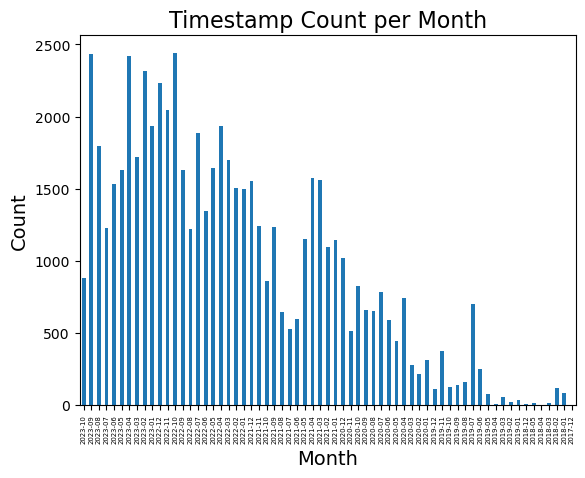

In [84]:
#Let's now visualize our data:
plot_olivia = df_olivia["combined_month"].value_counts().sort_index(ascending=False).plot(kind='bar')
#When first plotting, noticed the x-axis ticks overlapped. Consulted with resources to fix this!
plot_olivia.tick_params(axis='x', labelsize = 5)
plt.title("Timestamp Count per Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

While this barchat is a heaping mass it is great to visualize the counts per month! While simplistic in nature it paints an intersting picture when placed into chronological order! There's a lot higher counts in recent times. For example, in the past year, there was a decrease in counts furing summer months compared to earlier in the year!... This makes me wonder if this may be linked to having free time or being used as a background at times for studying...

What source is this?
    I think this data may be from a music streaming service. The aspects of these timestamps that make me feel this way are the high values of counts on days which could be potentially as this is on a per track basis. If it is my partners preference to listen to music while studying it might further make sense why there appears to be higher counts outside of summer months. Entering into college and having more time to listen to music may also be represented in this or the service itself become more utilized by Olivia!

Partner Feedback: WOW! Olivia's music comes from apple music and was pretty surprised by what her data reflected. She divulged that her old car prior to college didn't have a hookup so she primarly listened to the radio instead of through her streaming service. 